In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statistics

# Dataset

Vamos supor que temos um site e aplicativo móvel que usa análises de mídia social para classificar os usuários de acordo com sua influência social online.

O site calculou um "score", que é um valor numérico entre 0 e 5, onde pontuações mais altas correspondiam a maior "influência social" online.

In [2]:
from numpy.random import seed
from numpy.random import normal

In [3]:
seed(1)
data = normal(loc=0, scale=1, size=200)+2.5

In [5]:
df = pd.DataFrame(data, columns=['score'])
df['score'] = np.where(df['score']>=5, 5, df['score'])
df['score'] = np.where(df['score']<=0, 0, df['score'])

## Análise exploratória (EDA)

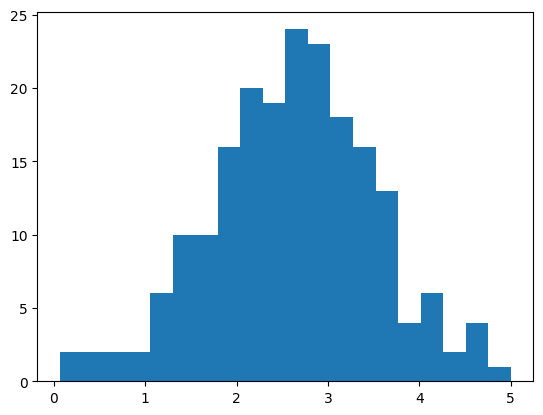

In [7]:
plt.hist(df.score, bins = 20);

In [8]:
mean = df.score.mean()
median = df.score.median()
std = df.score.std()
print(f"Média: {mean}")
print(f"Mediana: {median}")
print(f"Desvio padrão: {std}")

Média: 2.6065471863139167
Mediana: 2.6297612404944113
Desvio padrão: 0.9119539666106046


### Z-score

Vamos supor que fazemos um sorteio para selecionarmos 30 pessoas aleatórias dessa população de 1048 para que essas pessoas de score ??? sejam nossas novas influencers. Qual a probabilidade da <b>média</b> dessas 30 pessoas ser menor que 3? Use média da população = 2.6 e desvio da população = 0.91

In [9]:
import scipy.stats as st

In [10]:
# 3 pq queremos menor que 3
z = (3-mean)/std
st.norm.cdf(z)
# A área abaixo da curva é de 0.6669255232810484

0.6669255232810484

Logo a probabilidade de selecionarmos uma amostra menor que 3 é de 66.6%

In [13]:
alpha = 0.05 # 1 - confiança = 1-0.95 = 0.05
area_rejeicao = alpha / 2 # 2 pq é bilateral

critical_value = st.norm.ppf(area_rejeicao)*(-1) # se não multiplicarmos por -1 ele dá a simetria de z-score
critical_value

1.9599639845400545